<a href="https://colab.research.google.com/github/allansundays/one_model_per_day/blob/main/solubility_Lm_Rt_Et.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Model Implementation: https://towardsdatascience.com/how-to-build-your-first-machine-learning-model-in-python-e70fd1907cdd
A regression model using the random forest algorithm
DataSet:solubility DataSet

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')

In [6]:
df.shape
#  It is comprised of 1444 rows and 5 columns.

(1144, 5)

In [4]:
df.head()
# Each row represents a unique molecule and each molecule is described by
# 4 molecular properties (the first 4 columns) while the last column is the target variable to be predicted. 

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [7]:
# Assigning variables to X
# To assign the first 4 columns to the xx variable:
x = df.drop(['logS'], axis = 1)

In [8]:
# Assign the last column to the y variable
y = df.iloc[:,-1]
# Alternative approach
# y = df['logS']
# y = df.logS

In [10]:
x.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.5954,167.850,0.0,0.0
1,2.3765,133.405,0.0,0.0
2,2.5938,167.850,1.0,0.0
3,2.0289,133.405,1.0,0.0
4,2.9189,187.375,1.0,0.0


In [11]:
# This target variable represents the solubility of a molecule, which is an important parameter of a therapeutic drug,
# as it helps a molecule travel inside the body to reach its target.
y.head()

0   -2.18
1   -2.00
2   -1.74
3   -1.48
4   -3.04
Name: logS, dtype: float64

In [9]:
# Data spliting: train/test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

##Linear Regression

In [13]:
# Model building

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Making Predictions
# The model (lr) is applied to make predictions via the lr.predict() function on the training set and test set

y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [16]:
# Model performance metrics: MSE and R2

from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [20]:
# Printing Metrics:

print('MSE for the training set is: ',lr_train_mse)
print('R2 for the training set is: ',lr_train_r2)
print('MSE for the testing set is: ',lr_test_mse)
print('R2 for the testing set is: ',lr_test_r2)

MSE for the training set is:  1.0139894491573003
R2 for the training set is:  0.7695127746587307
MSE for the testing set is:  0.9990844407075306
R2 for the testing set is:  0.7705650058569232


In [21]:
# Metrics as a DataFrame:

lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()

lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [22]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.01399,0.769513,0.999084,0.770565


##Random Forest

In [24]:
# Model Building

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 42)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

<<Warning!>>

It should be noted here that RandomForestRegressor is the regression version \(i.e. this is used for when the Y variable comprises of numerical values) while its sister version is the RandomForestClassifier, which is the classification version (i.e. this is used for when the Y variable contains categorical values).



In [25]:
#Predictions
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [26]:
# Model performance metrics: 

from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [27]:
#DF_metrics:
rf_results =pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()

rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.05025,0.76127,1.047,0.759562


In [33]:
# Combining results
results = pd.concat([lr_results, rf_results])
results 

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.01399,0.769513,0.999084,0.770565
0,Random forest,1.05025,0.76127,1.047,0.759562


##Extra Tree Regressor

In [28]:
# Importing regression function
from sklearn.tree import ExtraTreeRegressor

# assigned to a variable
et = ExtraTreeRegressor(random_state = 42)

# Model training
et.fit(x_train, y_train)

ExtraTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                   max_features='auto', max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, random_state=42,
                   splitter='random')

In [34]:
#Predictions
y_et_train_pred = et.predict(x_train)
y_et_test_pred = et.predict(x_test)

In [35]:
# Model performance metrics: 

from sklearn.metrics import mean_squared_error, r2_score

et_train_mse = mean_squared_error(y_train, y_et_train_pred)
et_train_r2 = r2_score(y_train, y_et_train_pred)

et_test_mse = mean_squared_error(y_test, y_et_test_pred)
et_test_r2 = r2_score(y_test, y_et_test_pred)

In [36]:
#DF_metrics:
et_results =pd.DataFrame(['Extra Tree Regressor', et_train_mse, et_train_r2, et_test_mse, et_test_r2]).transpose()

et_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

et_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Extra Tree Regressor,0.0211266,0.995198,0.841034,0.806861


In [37]:
# Combining results
results = pd.concat([lr_results, rf_results, et_results])
results 

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.01399,0.769513,0.999084,0.770565
0,Random forest,1.05025,0.76127,1.047,0.759562
0,Extra Tree Regressor,0.0211266,0.995198,0.841034,0.806861


## Data visualization of prediction results

In [39]:
# visualize the relationship of the actual Y values with their predicted Y values that is the experimental logS 
# versus the predicted logS values

import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental LogS')

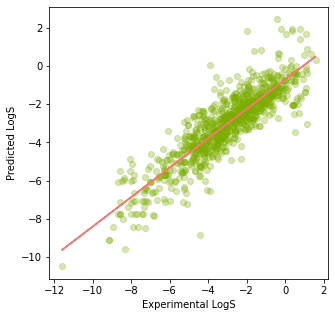

In [40]:
plt.figure(figsize=(5,5))
# Scatter plot
plt.scatter(x = y_train, y = y_lr_train_pred, c="#7CAE00", alpha=0.3)

# trend line
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), "#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')